In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten,GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/headlines.csv')

In [0]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [0]:
df.shape

(26709, 3)

In [0]:
headlines=df['headline']
headlines

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [0]:
label=df['is_sarcastic']
label

0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64

## Splitting The Data



In [0]:
x_train,x_test,y_train,y_test=train_test_split(headlines,label,test_size=0.3)

## Preparing the train data




In [0]:
tokenizer=Tokenizer()

In [0]:
tokenizer.fit_on_texts(x_train)

In [0]:
word_index=tokenizer.word_index
vocab_size=len(word_index)
vocab_size

24915

In [0]:
train_sequence=tokenizer.texts_to_sequences(x_train)  

In [0]:
training_padded = pad_sequences(train_sequence, padding='post',truncating='post',)

## Preparing the test data



In [0]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequence, padding='post',truncating='post')

## Building And Testing Accuracy With Different Models




### Simple Model with ANN

In [0]:
model1=Sequential()

In [0]:
model1.add(Embedding(input_dim=24915+1,output_dim=32))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(units=32,activation='relu'))
tf.keras.layers.Dropout(0.2)
model1.add(Dense(units=1,activation='sigmoid'))

In [0]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          797312    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 798,401
Trainable params: 798,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model1.fit(training_padded,y_train,epochs=20,validation_data=(test_padded,y_test))

Epoch 1/20
585/585 [==============================] - 5s 9ms/step - loss: 0.5644 - accuracy: 0.7030 - val_loss: 0.3796 - val_accuracy: 0.8309
Epoch 2/20
585/585 [==============================] - 5s 9ms/step - loss: 0.2925 - accuracy: 0.8873 - val_loss: 0.3549 - val_accuracy: 0.8494
Epoch 3/20
585/585 [==============================] - 5s 9ms/step - loss: 0.1928 - accuracy: 0.9298 - val_loss: 0.3559 - val_accuracy: 0.8626
Epoch 4/20
585/585 [==============================] - 5s 9ms/step - loss: 0.1296 - accuracy: 0.9560 - val_loss: 0.3946 - val_accuracy: 0.8581
Epoch 5/20
585/585 [==============================] - 5s 9ms/step - loss: 0.0866 - accuracy: 0.9726 - val_loss: 0.4469 - val_accuracy: 0.8535
Epoch 6/20
585/585 [==============================] - 5s 9ms/step - loss: 0.0578 - accuracy: 0.9843 - val_loss: 0.5087 - val_accuracy: 0.8490
Epoch 7/20
585/585 [==============================] - 5s 9ms/step - loss: 0.0391 - accuracy: 0.9905 - val_loss: 0.5748 - val_accuracy: 0.8445
Epoch 

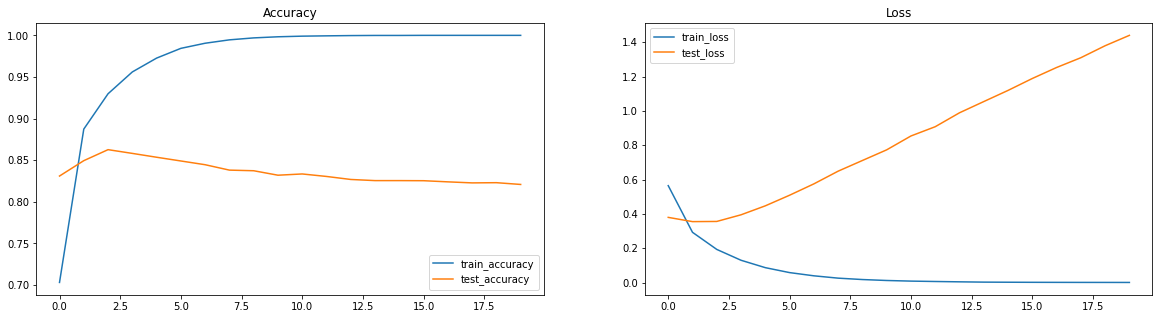

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Bidirectional Single Layer LSTM

In [0]:
model2=Sequential()

In [0]:
model2.add(Embedding(input_dim=vocab_size+1,output_dim=32))
tf.keras.layers.Dropout(0.2)
model2.add(Bidirectional(LSTM(64)))
tf.keras.layers.Dropout(0.2)
model2.add(Dense(units=32,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))

In [0]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          797312    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 851,137
Trainable params: 851,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model2.fit(training_padded,y_train,epochs=20,validation_data=(test_padded,y_test))

Epoch 1/20
585/585 [==============================] - 9s 15ms/step - loss: 0.4015 - accuracy: 0.8080 - val_loss: 0.3344 - val_accuracy: 0.8544
Epoch 2/20
585/585 [==============================] - 9s 15ms/step - loss: 0.1701 - accuracy: 0.9347 - val_loss: 0.3472 - val_accuracy: 0.8586
Epoch 3/20
585/585 [==============================] - 8s 14ms/step - loss: 0.0704 - accuracy: 0.9757 - val_loss: 0.4882 - val_accuracy: 0.8434
Epoch 4/20
585/585 [==============================] - 8s 14ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.5608 - val_accuracy: 0.8462
Epoch 5/20
585/585 [==============================] - 8s 14ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.7029 - val_accuracy: 0.8467
Epoch 6/20
585/585 [==============================] - 8s 14ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.8122 - val_accuracy: 0.8433
Epoch 7/20
585/585 [==============================] - 8s 14ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.8894 - val_accuracy: 0.8400

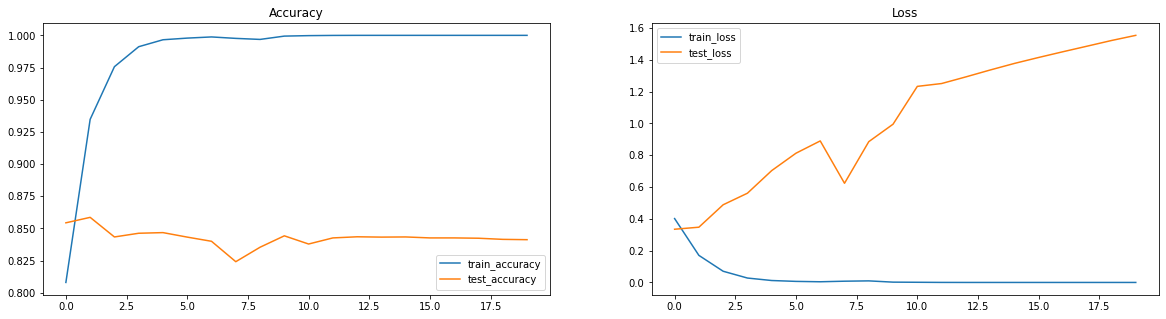

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Bidirectional Multilayer Layer LSTM

In [0]:
model3=Sequential()

In [0]:
model3.add(Embedding(input_dim=vocab_size+1,output_dim=32))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
tf.keras.layers.Dropout(0.2)
model3.add(Bidirectional(LSTM(32)))
tf.keras.layers.Dropout(0.2)
model3.add(Dense(units=64,activation='relu'))
model3.add(Dense(units=1,activation='sigmoid'))

In [0]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          797312    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 892,417
Trainable params: 892,417
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model3.fit(training_padded,y_train,epochs=20,validation_data=(test_padded,y_test))

Epoch 1/20
585/585 [==============================] - 12s 20ms/step - loss: 0.3971 - accuracy: 0.8069 - val_loss: 0.3208 - val_accuracy: 0.8626
Epoch 2/20
585/585 [==============================] - 11s 18ms/step - loss: 0.1543 - accuracy: 0.9404 - val_loss: 0.3709 - val_accuracy: 0.8575
Epoch 3/20
585/585 [==============================] - 11s 18ms/step - loss: 0.0523 - accuracy: 0.9821 - val_loss: 0.5281 - val_accuracy: 0.8401
Epoch 4/20
585/585 [==============================] - 11s 18ms/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.5966 - val_accuracy: 0.8369
Epoch 5/20
585/585 [==============================] - 11s 18ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.7613 - val_accuracy: 0.8388
Epoch 6/20
585/585 [==============================] - 11s 18ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.8456 - val_accuracy: 0.8365
Epoch 7/20
585/585 [==============================] - 11s 18ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.9544 - val_accuracy:

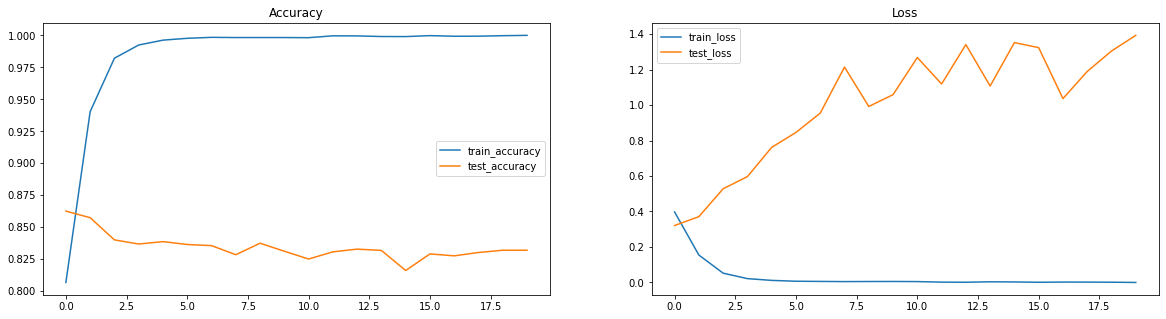

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Single Layer LSTM

In [0]:
model4=Sequential()

In [0]:
model4.add(Embedding(input_dim=vocab_size+1,output_dim=32))
tf.keras.layers.Dropout(0.2)
model4.add(LSTM(62))
tf.keras.layers.Dropout(0.2)
model4.add(Dense(units=64,activation='relu'))
model4.add(Dense(units=1,activation='sigmoid'))

In [0]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          797312    
_________________________________________________________________
lstm_3 (LSTM)                (None, 62)                23560     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4032      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 824,969
Trainable params: 824,969
Non-trainable params: 0
_________________________________________________________________


In [0]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model4.fit(training_padded,y_train,epochs=20,validation_data=(test_padded,y_test))

Epoch 1/20
585/585 [==============================] - 7s 11ms/step - loss: 0.5929 - accuracy: 0.6573 - val_loss: 0.3902 - val_accuracy: 0.8334
Epoch 2/20
585/585 [==============================] - 6s 11ms/step - loss: 0.2783 - accuracy: 0.8888 - val_loss: 0.3746 - val_accuracy: 0.8574
Epoch 3/20
585/585 [==============================] - 6s 11ms/step - loss: 0.1334 - accuracy: 0.9552 - val_loss: 0.3456 - val_accuracy: 0.8535
Epoch 4/20
585/585 [==============================] - 6s 11ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.4699 - val_accuracy: 0.8411
Epoch 5/20
585/585 [==============================] - 6s 11ms/step - loss: 0.0425 - accuracy: 0.9879 - val_loss: 0.4300 - val_accuracy: 0.8419
Epoch 6/20
585/585 [==============================] - 6s 11ms/step - loss: 0.0318 - accuracy: 0.9915 - val_loss: 0.4674 - val_accuracy: 0.8364
Epoch 7/20
585/585 [==============================] - 6s 11ms/step - loss: 0.0220 - accuracy: 0.9948 - val_loss: 0.5893 - val_accuracy: 0.8343

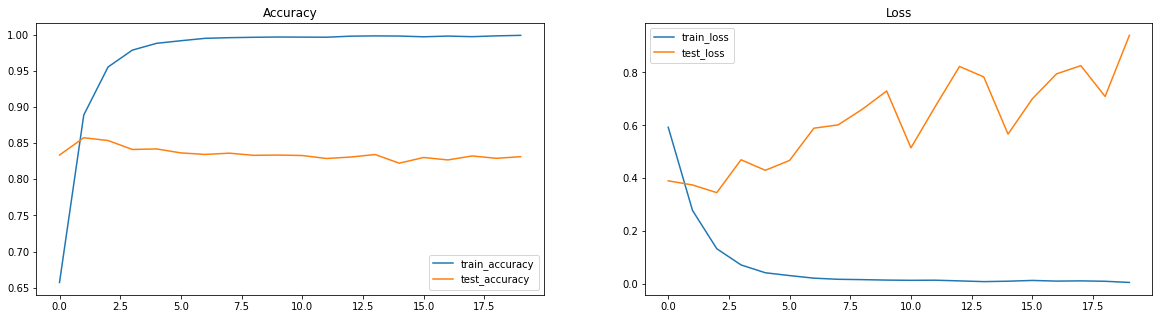

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

#### * Single Layer LSTM has a good accuracy and also accuracy is constant and loss first increses and the decrease .So it if as good fit model.*

